In [1]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords, words
from nltk import word_tokenize
import re
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/All_Friends_data.csv"
df = pd.read_csv(url, error_bad_lines=False)

In [3]:
df = df.drop("Unnamed: 0",axis=1)

In [4]:
# function for clearing lines
def cleanLines(line):
    #Exclude links
    line = re.sub(r'\([^)]*\)','',line)
    #Remove everything besides letters
    line = re.sub("([^a-z \t])|(\w+:\/\/\S+)", "", line)
    #Create a string for tweet
    line = [''.join(s for s in line)]
    return(line) 

In [5]:
#create list of real words
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

In [6]:
#Add words to stopwords
stopWords = nltk.corpus.stopwords.words('english')
newStopWords = ["like","get","yeah","know","gonna","hey","uh","oh","well","okay","im","dont","youre","thats","got"]
stopWords.extend(newStopWords)

### Find text from each location

In [8]:
locations = ["central perk","monica and rachel's","chandler and joey's","monica and chandler's",""]

In [9]:
rossApartment = df[['Speaker','Text','Scene']][df['Scene'].str.contains("(ross's apartment)|(ross apartment)|(ross' apartment)",na=False)].reset_index(drop=True)

C:\Users\thork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [10]:
centralPerk = df[['Speaker','Text','Scene']][df['Scene'].str.contains('central perk',na=False)].reset_index(drop=True)

In [11]:
monrachApartment = df[['Speaker','Text','Scene']][df['Scene'].str.contains("(monica and rachel's)|(rachel and monica's)",na=False)].reset_index(drop=True)

C:\Users\thork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [12]:
chajoeyApartment = df[['Speaker','Text','Scene']][df['Scene'].str.contains("(chandler and joey's)|(joey and chandler's)",na=False)].reset_index(drop=True)

C:\Users\thork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [13]:
monchaApartment = df[['Speaker','Text','Scene']][df['Scene'].str.contains("(chandler and monica's)|(monica and chandler's)",na=False)].reset_index(drop=True)

C:\Users\thork\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [14]:
Locations = [centralPerk, rossApartment, monrachApartment, chajoeyApartment, monchaApartment]

In [15]:
locationnames = ["Central Perk","Ross' apartment","Monica and Rachel's apartment","Chandler and Joey's apartment","Monica and Chandler's apartment"]
for n in range(len(Locations)):
    print("At",locationnames[n], "the most common speakers are")
    print(FreqDist(Locations[n].Speaker).most_common(3),"\n")

At Central Perk the most common speakers are
[('phoebe', 1945), ('ross', 1873), ('rachel', 1581)] 

At Ross' apartment the most common speakers are
[('ross', 437), ('rachel', 175), ('joey', 84)] 

At Monica and Rachel's apartment the most common speakers are
[('monica', 2207), ('rachel', 2095), ('ross', 1644)] 

At Chandler and Joey's apartment the most common speakers are
[('chandler', 1031), ('joey', 933), ('ross', 469)] 

At Monica and Chandler's apartment the most common speakers are
[('monica', 1251), ('chandler', 1143), ('joey', 646)] 



From this we can see that Phoebe often is there when the friends meet at Central Perk
That Rachel is the one who often visit Ross
It makes sense that the ones who lives in the apartment are the ones who speaks the most in their apartment.
Ross is the one who visit the friends most often besides from when Monica and Chandler moves in together, then it's Joey who visit them often - he also lives right next door and is used to hang out with Chandler a lot

In [16]:
#Create list for the words at each location
allwords = []

#Central Perk
n = 0
linesCentralPerk = []
for line in Locations[n].Text:
    words = [w for w in line.split() if w in english_vocab and w not in stopWords]
    linesCentralPerk.extend(words)
allwords.extend(linesCentralPerk)

#Ross' apartment
n += 1
linesRossAp = []
for line in Locations[n].Text:
    words = [w for w in line.split() if w in english_vocab and w not in stopWords]
    linesRossAp.extend(words)
allwords.extend(linesRossAp)

#Monica and Rachel's apartment
n += 1
linesMonRacAp = []
for line in Locations[n].Text:
    words = [w for w in line.split() if w in english_vocab and w not in stopWords]
    linesMonRacAp.extend(words)
allwords.extend(linesMonRacAp)

#Chandler and Joey's apartment
n += 1
linesChaJoeyAp = []
for line in Locations[n].Text:
    words = [w for w in line.split() if w in english_vocab and w not in stopWords]
    linesChaJoeyAp.extend(words)
allwords.extend(linesChaJoeyAp)

#Monica and Chandlers's apartment
n += 1
linesMonChaAp = []
for line in Locations[n].Text:
    words = [w for w in line.split() if w in english_vocab and w not in stopWords]
    linesMonChaAp.extend(words)
allwords.extend(linesMonChaAp)

In [17]:
url = "https://raw.githubusercontent.com/LunaHub/Friends_social_data_analysis_2019/master/data/Data_Set_S1.csv"
s1 = pd.read_csv(url, sep='\t')
# Sentiment dictonary:
sentiments = dict(zip(s1.word,s1.happiness_average))
# Function that calculates sentiment given a list of tokens
def sentiment_func(token_list):
    res = []
    for word in token_list:
        if word in s1.word.values:
            res.append(sentiments[word])
        
    return sum(res)/len(res) if len(res) else 0

In [18]:
Locations = [centralPerk, rossApartment, monrachApartment, chajoeyApartment, monchaApartment]

In [19]:
#Sentiment for Central Perk
CPsent = []
for line in linesCentralPerk:
    CPsent.append(sentiment_func(line))

In [20]:
#Clear out 0 instances
CPsent = [i for i in CPsent if i > 0]

In [21]:
#Sentiment for season 2
RAsent = []
for line in linesRossAp:
    RAsent.append(sentiment_func(line))

#Sentiment for season 3
MRAsent = []
for line in linesMonRacAp:
    MRAsent.append(sentiment_func(line))
    
    
#Sentiment for season 4
CJAsent = []
for line in linesChaJoeyAp:
    CJAsent.append(sentiment_func(line))

#Sentiment for season 5
MCAsent = []
for line in linesMonChaAp:
    MCAsent.append(sentiment_func(line))



In [22]:
#Clear out 0 instances
RAsent = [i for i in RAsent if i > 0]
MRAsent = [i for i in MRAsent if i > 0]
CJAsent = [i for i in CJAsent if i > 0]
MCAsent = [i for i in MCAsent if i > 0]


In [23]:
locationnames = ["Central Perk","Ross' apartment","Monica and Rachel's apartment","Chandler and Joey's apartment","Monica and Chandler's apartment"]


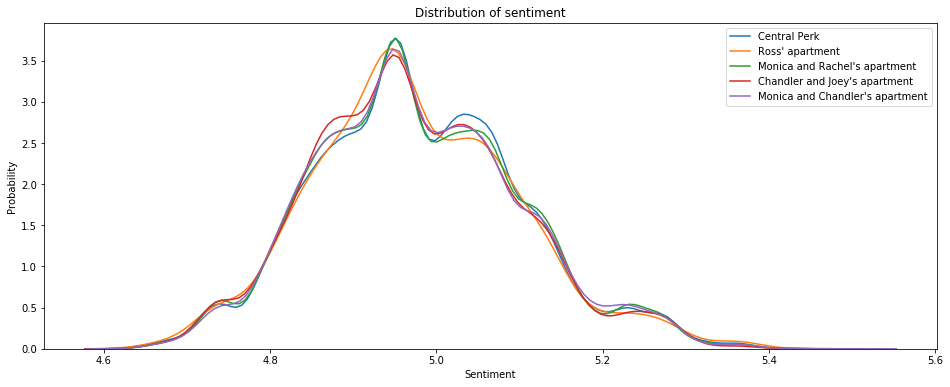

In [24]:
# Distribution plot:
plt.figure(figsize=(16, 6))
sns.kdeplot(CPsent, label="Central Perk")
sns.kdeplot(RAsent, label="Ross' apartment")
sns.kdeplot(MRAsent, label="Monica and Rachel's apartment")
sns.kdeplot(CJAsent, label="Chandler and Joey's apartment")
sns.kdeplot(MCAsent, label="Monica and Chandler's apartment")
plt.legend();
plt.xlabel('Sentiment');
plt.ylabel('Probability');
plt.title('Distribution of sentiment');
plt.show()

In [25]:
allsent = [CPsent,RAsent,MRAsent,CJAsent,MCAsent]

In [26]:
#Create lists for mean, min and max
allmean = []
allmin = []
allmax = []

for location in allsent:
    allmean.append(np.mean(location))
    allmin.append(min(location))
    allmax.append(max(location))

In [27]:
from prettytable import PrettyTable

t = PrettyTable()
column_names = ['','mean','max','min']
t.add_column(column_names[0],["Central Perk","Ross' apartment","Monica and Rachel's apartment","Chandler and Joey's apartment","Monica and Chandler's apartment"]
)
t.add_column(column_names[1],allmean)
t.add_column(column_names[2],allmax)
t.add_column(column_names[3],allmin)
print(t)

+---------------------------------+---------------+---------------+------+
|                                 |      mean     |      max      | min  |
+---------------------------------+---------------+---------------+------+
|           Central Perk          | 4.97919311616 |     5.404     | 4.64 |
|         Ross' apartment         | 4.97540557794 |      5.38     | 4.66 |
|  Monica and Rachel's apartment  | 4.97778704559 |     5.425     | 4.64 |
|  Chandler and Joey's apartment  | 4.97392204974 |      5.42     | 4.64 |
| Monica and Chandler's apartment |  4.9778854723 | 5.49333333333 | 4.64 |
+---------------------------------+---------------+---------------+------+
